## 1번

In [20]:
from sklearn import datasets

boston = datasets.load_boston()
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


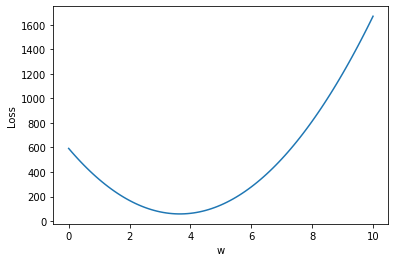

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 주택 1가구당 방의 개수 데이터만 이용
x_data = boston.data[:, 5] # (506,)
y_data = boston.target # (506,)

def forward(x):
    return x * w

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

w_list = []
mse_list = []

for w in np.arange(0.0, 10.1, 0.1):
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l

    w_list.append(w)
    mse_list.append(l_sum / len(x_data))

plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## 2번

In [48]:
x_data = [1.0, 2.0, 3.0]
y_data = [5.0, 14.0, 27.0]
w1 = 1.0
w2 = 1.0

def forward(x):
    return x * w1 + x * x * w2

def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) * (y_pred - y)

def gradient1(x, y):
    return 2 * x * (forward(x) - y)

def gradient2(x, y):
    return 2 * x * x * (forward(x) - y)

for epoch in range(100):
    l = 0
    for x_val, y_val in zip(x_data, y_data):
        grad1 = gradient1(x_val, y_val)
        w1 = w1 - 0.01 * grad1 
        print('\tgrad1:', x_val, y_val, grad1)
        l += loss(x_val, y_val)

    for x_val, y_val in zip(x_data, y_data):
        grad2 = gradient2(x_val, y_val)
        w2 = w1 - 0.001 * grad2
        print('\tgrad2:', x_val, y_val, grad2)
        l += loss(x_val, y_val)

    mse = l / 3
    print('progress:', epoch, 'w1=', w1, 'w2=', w2, 'mse=', mse)

print('test performance (after training)', '4 hours', forward(4))

	grad1: 1.0 5.0 -6.0
	grad1: 2.0 14.0 -31.52
	grad1: 3.0 27.0 -83.2464
	grad2: 1.0 5.0 -3.5846720000000003
	grad2: 2.0 14.0 -5.9174184960000105
	grad2: 3.0 27.0 -8.18595420364808
progress: 0 w1= 2.207664 w2= 2.215849954203648 mse= 63.89878222032386
	grad1: 1.0 5.0 -1.152972091592705
	grad1: 2.0 14.0 -2.7928509654142175
	grad1: 3.0 27.0 -1.895902322741776
	grad2: 1.0 5.0 -1.0361375839977303
	grad2: 2.0 14.0 -3.1949434150327107
	grad2: 3.0 27.0 3.9911316534924666
progress: 1 w1= 2.266081253797487 w2= 2.262090122143994 mse= 0.39805818629944834
	grad1: 1.0 5.0 -0.943657248117038
	grad1: 2.0 14.0 -1.6024154354668383
	grad1: 3.0 27.0 1.400622247175562
	grad2: 1.0 5.0 -0.9207482393888711
	grad2: 2.0 14.0 -2.648819664584181
	grad2: 3.0 27.0 6.376832548561815
progress: 2 w1= 2.2775357581615703 w2= 2.2711589256130083 mse= 0.25435742249023663
	grad1: 1.0 5.0 -0.9026106324508429
	grad1: 2.0 14.0 -1.368962274303243
	grad1: 3.0 27.0 2.0471087532264534
	grad2: 1.0 5.0 -0.8981213493802898
	grad2: 2.0 